#Introducition
In this project we predict the price group (e.g. low, high, very high) from set of features including ['battery_power', 'dual_sim', 'n_cores',...]. The dataset is avilable from Kaggle website [here](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

#Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Mobile Dataset

In [2]:
df_train = pd.read_csv('datasets_11167_15520_train.csv')
df_test = pd.read_csv('datasets_11167_15520_test.csv')
df_train.head(2)
# df_test.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2


In [6]:
# Columns data type
df_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [3]:
# the target value analysis
df_train['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

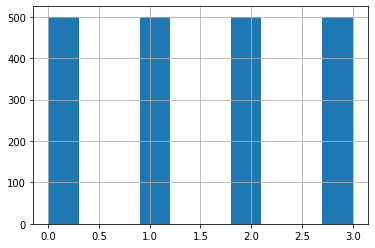

In [7]:
df_train['price_range'].hist()
plt.show()

In [9]:
#  convert the target column to one-hot encode
y = df_train['price_range'].values.reshape(-1,1)
y = OneHotEncoder().fit_transform(y).toarray()

In [10]:
# or we can use 'get_dummies'
# y_train = pd.get_dummies(df_train['price_range']).values.shape

In [11]:
# drop the target column so we get all the features we use in the training
x = np.asarray(df_train.drop('price_range', axis=1))

In [12]:
# normlise the features
x = StandardScaler().fit(x).fit_transform(x)

In [13]:
# splite the train set into training 70% and valdation 30%
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [14]:
x_test.shape

(600, 20)

In [15]:
# define the model
model = Sequential()
model.add(Dense(16, input_dim = x_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [17]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')

In [18]:
history = model.fit(x_train, y_train, batch_size=64, epochs=100,verbose=1, validation_data=(x_test, y_test))

Epoch 1/100
22/22 [==============================] - 0s 9ms/step - loss: 1.5460 - acc: 0.2464 - val_loss: 1.4784 - val_acc: 0.2417
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 1.4263 - acc: 0.2750 - val_loss: 1.4111 - val_acc: 0.2750
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 1.3684 - acc: 0.3093 - val_loss: 1.3679 - val_acc: 0.2967
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 1.3241 - acc: 0.3571 - val_loss: 1.3271 - val_acc: 0.3400
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 1.2805 - acc: 0.4021 - val_loss: 1.2839 - val_acc: 0.3817
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 1.2329 - acc: 0.4407 - val_loss: 1.2342 - val_acc: 0.4233
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 1.1771 - acc: 0.4907 - val_loss: 1.1793 - val_acc: 0.4733
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 1.1145 - a

In [19]:
# predict on the test set
y_hat = model.predict(x_test)

In [21]:
# extract the accuracy score on the testset
accuracy_score(y_test.argmax(axis=1), y_hat.argmax(axis=1))

0.9216666666666666

In [22]:
# extract the evalution metrices on the test set
print(classification_report(y_test.argmax(axis=1), y_hat.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       162
           1       0.88      0.89      0.89       144
           2       0.91      0.94      0.92       154
           3       0.97      0.93      0.95       140

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



In [23]:
# extract the confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1))

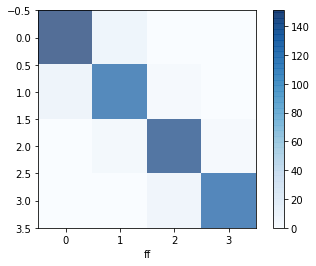

In [24]:
# plot the confusion matrix
plt.imshow(cm, alpha=0.7,cmap=plt.cm.Blues)
plt.xlabel('ff')
plt.colorbar()


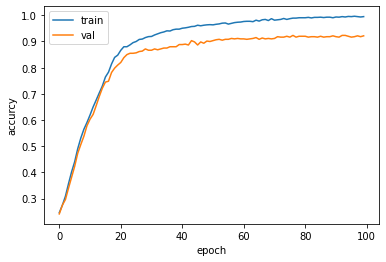

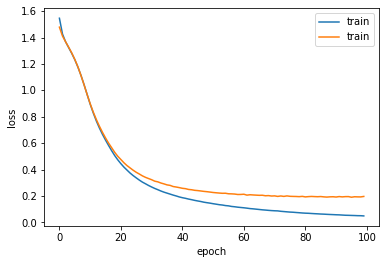

In [28]:
# plot the training&valdation accuracy and loss
accuray = history.history['acc']
val_accuray = history.history['val_acc']
error  = history.history['loss']
val_error  = history.history['val_loss']
plt.figure()
plt.plot( range(len(accuray)), accuray, label='train' )
plt.plot(val_accuray, label='val')
plt.xlabel('epoch')
plt.ylabel('accurcy')
plt.legend()
plt.figure()
plt.plot( range(len(accuray)), error, label='train')
plt.plot( range(len(accuray)), val_error, label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
